In [1]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [56]:
das28_to_discret <- function(label_df){
    
    label_df[label_df > 5.1] <- "H"
    label_df[label_df > 3.2 & label_df <= 5.1] <- "M"
#    label_df[label_df >= 2.6 & label_df <= 3.2] <- "L"
    label_df[label_df < 3.2] <- "L"
    
    return (label_df)
}

In [57]:
input_data <- '/Users/m221138/RA_project/analysis/all_in_one_r2/hd4_full/full.ml.ready.txt'
data_profile <- read.csv(input_data, sep="\t", row.names=1, header=TRUE)
data_profile <- as.data.frame(t(data_profile))

NUM_COL <- ncol(data_profile)

label_df <- data_profile[1]
data_profile <- data_profile[,2:NUM_COL]
#data_profile <- log(data_profile)

label_df <- das28_to_discret(label_df)

#data_profile$DAS28 <- label_df
#data_profile["DAS28"] <- label_df
#data_profile

In [58]:
features <- colnames(data_profile)
pca_results <- prcomp(data_profile, scale=TRUE)
data_profile["DAS28"] <- label_df
#data_profile

In [59]:
index <- order(-pca_results$rotation[,1])
pca_results$rotation[,1][index[1:20]]

100001580        424        229        891  100001278  100001182       1231 
0.06375194 0.05973415 0.05928378 0.05880837 0.05827095 0.05815756 0.05814801 
 100001739  100001195  100001193        180        439        980  100001277 
0.05791505 0.05749376 0.05746061 0.05702994 0.05700729 0.05662441 0.05536459 
 100008930  100002356        452        892  100002945        519 
0.05464156 0.05411568 0.05278060 0.05264029 0.05220727 0.05156378

[1] L L L L L L L M L L M M L L L M L L L L M M L L M L H M L L L L L L L L L
 [38] L M M M L M L M L H H M H L L L L L L L H M M L L L M L L L M L L L L L M
 [75] M M H L L M L L L L M L M M M M M M M M M L M L L L H H L L L L L H M M M
[112] M L L M M L M H H L M L L L L L L
Levels: H L M

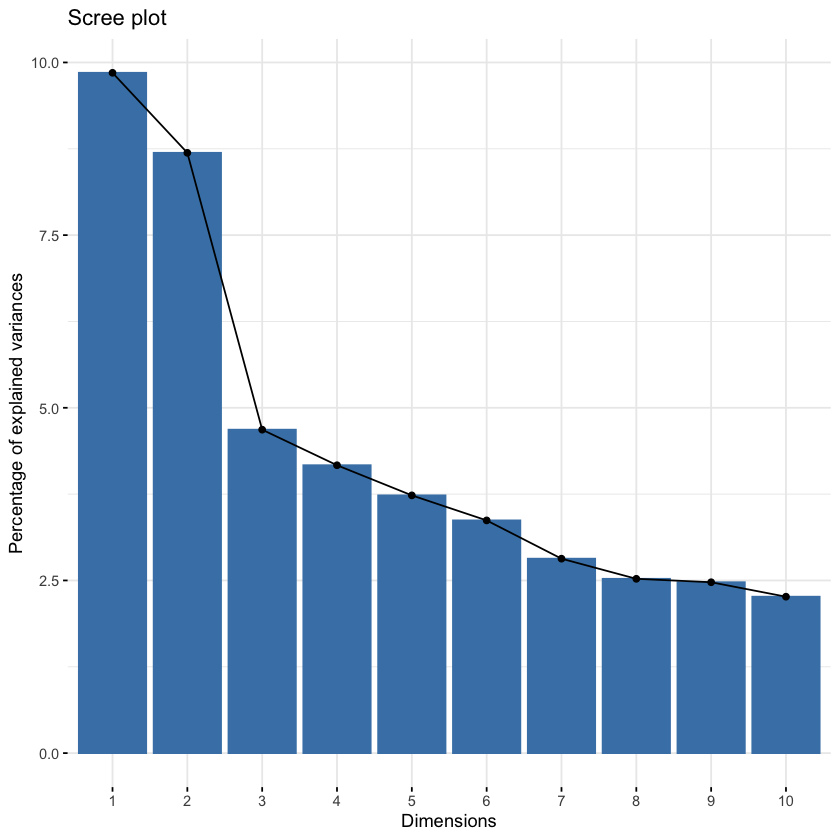

In [60]:
fviz_eig(pca_results)
labels <- as.factor(data_profile$DAS28)
labels

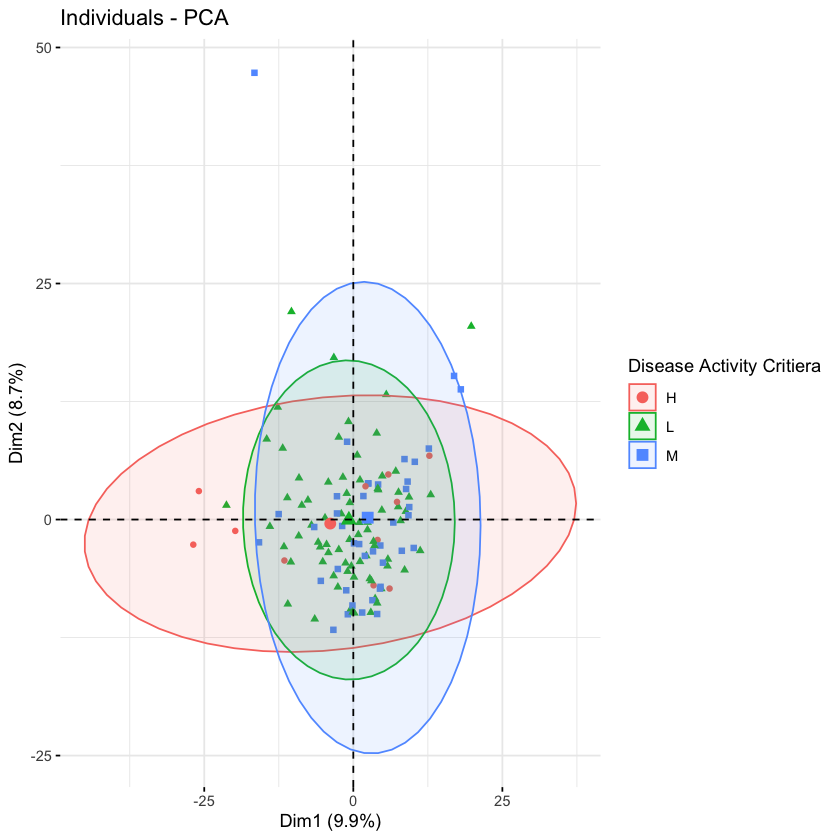

In [61]:
fviz_pca_ind(pca_results, geom="point", 
            col.ind = labels,
            legend.title = "Disease Activity Critiera",
            addEllipses = TRUE,
            repel = TRUE)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38


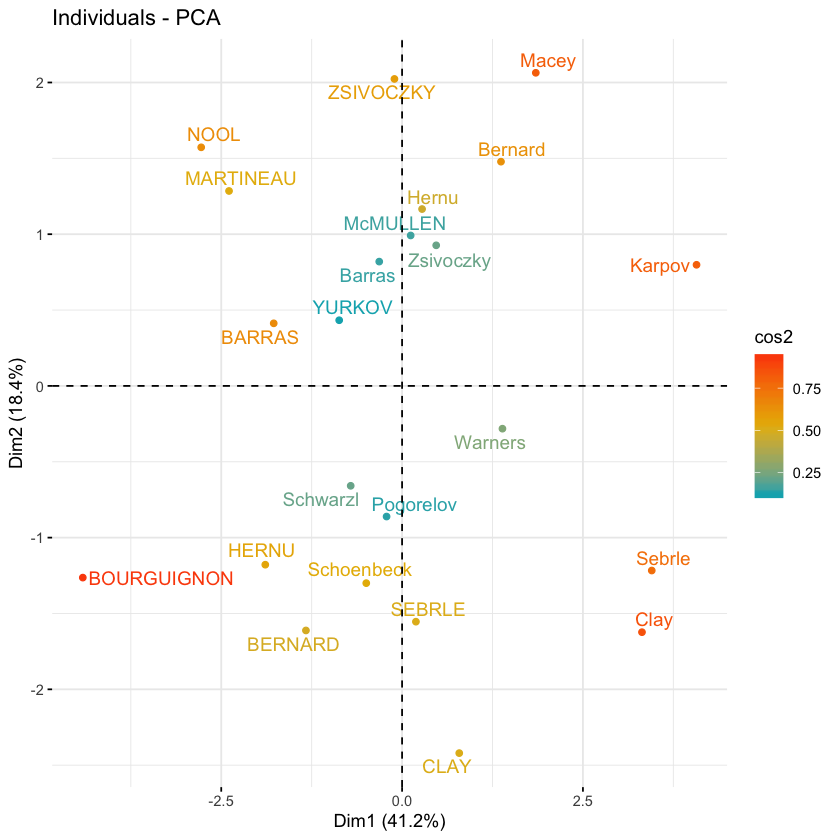

In [17]:
data(decathlon2)
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6])
res.pca <- prcomp(decathlon2.active, scale = TRUE)
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

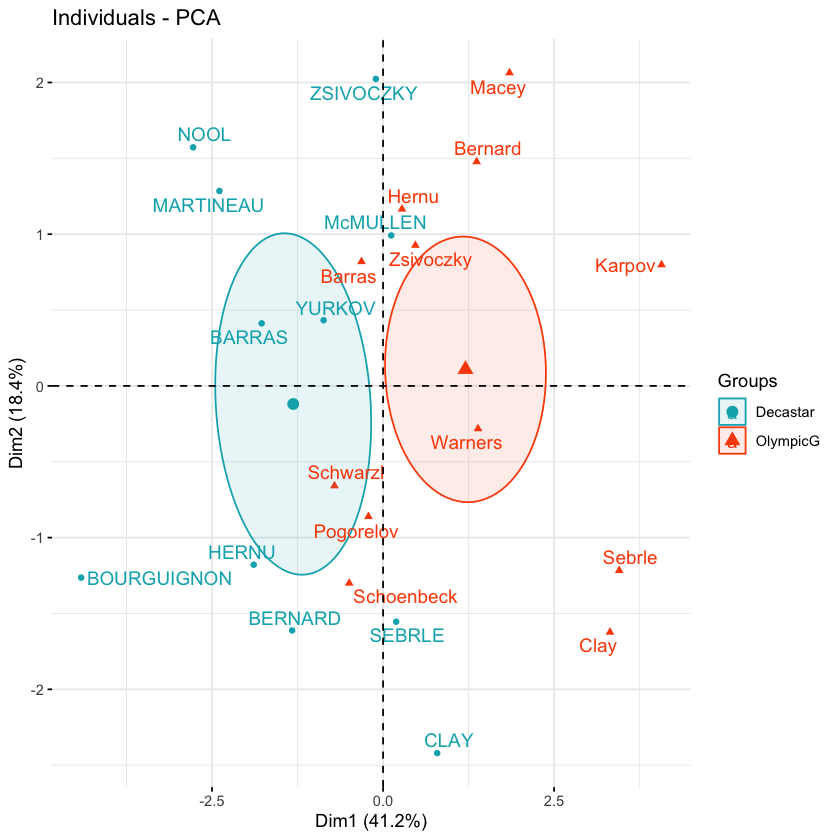

In [29]:
groups <- as.factor(decathlon2$Competition[1:23])
fviz_pca_ind(res.pca,
             col.ind = groups, # color by groups
             palette = c("#00AFBB",  "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE
             )

In [30]:
groups

[1] Decastar Decastar Decastar Decastar Decastar Decastar Decastar Decastar
 [9] Decastar Decastar Decastar OlympicG OlympicG OlympicG OlympicG OlympicG
[17] OlympicG OlympicG OlympicG OlympicG OlympicG OlympicG OlympicG
Levels: Decastar OlympicG